Objective:
Detect wheat heads from outdoor images of wheat plants, including wheat datasets from around the globe by using worldwide data, I will focus on a generalized solution to estimate the number and size of wheat heads.

# Libraries

In [55]:
# Data manipulation and Visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

# Preprocessing and Modeling
import torch
import torchvision
import torchvision.transforms as T
import cv2
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from tqdm import tqdm

# Getting the Dataset

DOWNLOADING ZIP FILE DIRECTLY KNOWING URL

In [2]:
#url = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19989/1160143/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1737959743&Signature=QlbSlOeXgrAKLJN5eHKuDBaXMFIexVCBSBjGB9Cb%2Bx4in05EZgSx%2FVEfRV2scIVRkrP%2FNEnOSqJedEHgoGahSpnLIPrs9aknJoZlcdS56pal4AKcdTWudHaEpN5vcxenBSS08zywENuH41FqC0wMYZDjtlo6SPL%2BY4DL8W3fzPTELrHlfm7pEySavV7Fdbd%2BYc%2FZkFinNpV4q5b6eyB2sMoWkjcStcI1hg9EpqXgs%2FYpuuCaq%2BIIpCLGlTgBaKGedPQTFEkFfk18zIRz3V0UR%2BB2t0LBTN1zuwg4f32dLEYg89knhL0CQx0kfeilKRPSyDkRyP98A91irYHY%2BwJtQA%3D%3D&response-content-disposition=attachment%3B+filename%3Dglobal-wheat-detection.zip"

!wget "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19989/1160143/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1739551418&Signature=Xtcmd9v18gbcJxGVRY6dG%2FNNhdVQp4NfOE%2F23yg1DCswewzQvcb3%2B5ZaHp%2BJUhWTViomR%2FfVKyv70RS%2BlNRsA6OHLP1TnttMd8PdkT8bPzg4Z8KALj4FWxt8AiOAcBgDlX6rwUQ5V7wt46KD%2FN3LCE4eGD2uug9oH457ddFh5YscFjURr0E9RhMROEqvLNtW%2BktBR3rq0L5Uih0hLQCrNBRG4FJXbwGbWqTH6U0gTnyVoyaLu5IjaYSGq0nITalRDhzf%2BxUKo%2Fsy5TUb0Mpi3HCyphb3sNlB3yWh3sSWZNh979GRehAPGa1jMiGSFYJKJC62SNEh1ByaQvrRkUv6XA%3D%3D&response-content-disposition=attachment%3B+filename%3Dglobal-wheat-detection.zip" -O global-wheat-detection.zip

--2025-02-11 17:59:25--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19989/1160143/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1739551418&Signature=Xtcmd9v18gbcJxGVRY6dG%2FNNhdVQp4NfOE%2F23yg1DCswewzQvcb3%2B5ZaHp%2BJUhWTViomR%2FfVKyv70RS%2BlNRsA6OHLP1TnttMd8PdkT8bPzg4Z8KALj4FWxt8AiOAcBgDlX6rwUQ5V7wt46KD%2FN3LCE4eGD2uug9oH457ddFh5YscFjURr0E9RhMROEqvLNtW%2BktBR3rq0L5Uih0hLQCrNBRG4FJXbwGbWqTH6U0gTnyVoyaLu5IjaYSGq0nITalRDhzf%2BxUKo%2Fsy5TUb0Mpi3HCyphb3sNlB3yWh3sSWZNh979GRehAPGa1jMiGSFYJKJC62SNEh1ByaQvrRkUv6XA%3D%3D&response-content-disposition=attachment%3B+filename%3Dglobal-wheat-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 636694264 (607M) [application/zip]
Saving to: ‘global-wheat-detection.zi

EXTRACT THE ZIP FILE

In [56]:
import zipfile

with zipfile.ZipFile("global-wheat-detection.zip", "r") as zip_ref:
     zip_ref.extractall("global_wheat")  # Extract to 'global_wheat' directory

Verify extracted contents

In [4]:
import os
print(os.listdir("global_wheat"))  # List files in the extracted directory

['test', 'train', 'train.csv', 'sample_submission.csv']


In [5]:
!ls global_wheat/test # list folders within the test folder

2fd875eaa.jpg  51b3e36ab.jpg  53f253011.jpg  aac893a91.jpg  cc3532ff6.jpg
348a992bb.jpg  51f1be19e.jpg  796707dd7.jpg  cb8d261a3.jpg  f5a1f0358.jpg


In [6]:
!ls global_wheat/train # list folders within the training folder

00333207f.jpg  2cfe966d3.jpg  57284abbb.jpg  832555118.jpg  ac1e7253a.jpg  d63d5214a.jpg
005b0d8bb.jpg  2cffefd1a.jpg  572a469e9.jpg  832cf59eb.jpg  ac47b0c64.jpg  d64fc42f7.jpg
006a994f7.jpg  2d06b68f0.jpg  5738fcf14.jpg  833577238.jpg  ac4e4e682.jpg  d688932d4.jpg
00764ad5d.jpg  2d07aba59.jpg  57393e4e9.jpg  834690a35.jpg  ac5bb0dfa.jpg  d6985490b.jpg
00b5c6764.jpg  2d0fc19b8.jpg  57570effa.jpg  83521e96e.jpg  ac6b1b3a3.jpg  d69f6d767.jpg
00b5fefed.jpg  2d159a876.jpg  57587eaf7.jpg  83842ec14.jpg  ac8365ca4.jpg  d6a22baf0.jpg
00b70a919.jpg  2d1b6ce2a.jpg  5758d6571.jpg  838e29709.jpg  ac83702f3.jpg  d6cd9fa5f.jpg
00e903abe.jpg  2d2c79df1.jpg  5780f8065.jpg  839814a17.jpg  ac891ac35.jpg  d6d425855.jpg
00ea5e5ee.jpg  2d3e3f783.jpg  5792ad7e6.jpg  83995f53f.jpg  ac8eb0616.jpg  d6d7c33f9.jpg
010b216d4.jpg  2d635716b.jpg  57956c488.jpg  83a5d8ac8.jpg  ac9e20f82.jpg  d6fdbf90e.jpg
010c93b99.jpg  2d65f77fb.jpg  57a0bb1bd.jpg  83a94fc79.jpg  aca4fa91a.jpg  d705ca450.jpg
010dbcc8f.jpg  2d6b77

In [7]:
train_df = pd.read_csv("/content/global_wheat/train.csv")
train_df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [8]:
submission_df = pd.read_csv("/content/global_wheat/sample_submission.csv")
submission_df.head()

,image_id,PredictionString
0,aac893a91,1.0 0 0 50 50
1,51f1be19e,1.0 0 0 50 50
2,f5a1f0358,1.0 0 0 50 50
3,796707dd7,1.0 0 0 50 50
4,51b3e36ab,1.0 0 0 50 50


# Preprocessing and Data Augmentation

- Created a WheatDataset class to load images and annotations.

-  Applied transformations for data augmentation.

- Built a DataLoader by using torch.utils.data.DataLoader to load batches efficiently.

In [39]:
import os
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
import cv2
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from tqdm import tqdm
import random


## Define paths, Load training data, and Select images to use

In [40]:
# Define paths
DATA_DIR = 'global_wheat'
TRAIN_CSV = os.path.join(DATA_DIR, 'train.csv')
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
TEST_DIR = os.path.join(DATA_DIR, 'test')
SAMPLE_SUBMISSION_CSV = os.path.join(DATA_DIR, 'sample_submission.csv')

# Load training data
train_df = pd.read_csv(TRAIN_CSV)
train_df['bbox'] = train_df['bbox'].apply(eval)  # Convert string to list

# Select subset of images (all images in train subfolder were used for training)
selected_images = train_df['image_id'].unique()[:]
train_df = train_df[train_df['image_id'].isin(selected_images)]

In [41]:
# Custom dataset class
class WheatDataset(Dataset):
    def __init__(self, dataframe, image_dir, transforms=None):
        self.df = dataframe
        self.image_dir = image_dir
        self.transforms = transforms
        self.image_ids = dataframe['image_id'].unique()

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, index):
        image_id = self.image_ids[index]
        image_path = os.path.join(self.image_dir, image_id + ".jpg")
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Get bounding boxes
        records = self.df[self.df['image_id'] == image_id]
        boxes = np.stack(records['bbox'].apply(lambda x: [x[0], x[1], x[0] + x[2], x[1] + x[3]]))
        labels = torch.ones((records.shape[0],), dtype=torch.int64)  # All labels are 1 (wheat head)
        boxes = torch.as_tensor(boxes, dtype=torch.float32)

        target = {'boxes': boxes, 'labels': labels, 'image_id': torch.tensor([index])}

        if self.transforms:
            image = self.transforms(image)

        return image, target


## Training Images Augmentation/transformation and Dataset Splitting

In [42]:
# Define transforms with augmentation
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((512, 512)),
    T.RandomHorizontalFlip(0.5),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    T.ToTensor()
])

# Create dataset and split into training and validation
full_dataset = WheatDataset(train_df, TRAIN_DIR, transforms=transform)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [44]:
# Load pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)

In [45]:
# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

# MODEL Training

In [46]:
# Training loop with progress feedback and validation
torch.manual_seed(42)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
num_epochs = 5
best_loss = float('inf')

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, targets in progress_bar:
        images = list(img.to(device) for img in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        loss = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    scheduler.step(total_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Total Loss: {total_loss:.4f}")

    if total_loss < best_loss:
        best_loss = total_loss
        torch.save(model.state_dict(), 'wheat_detector_best.pth')


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/5: 100%|██████████| 338/338 [11:22<00:00,  2.02s/it, loss=18.4]


Epoch 1/5, Total Loss: 6530.7650


Epoch 2/5: 100%|██████████| 338/338 [11:31<00:00,  2.05s/it, loss=12.7]


Epoch 2/5, Total Loss: 6410.2718


Epoch 3/5: 100%|██████████| 338/338 [11:28<00:00,  2.04s/it, loss=12.6]


Epoch 3/5, Total Loss: 6359.0157


Epoch 4/5: 100%|██████████| 338/338 [11:25<00:00,  2.03s/it, loss=18.6]


Epoch 4/5, Total Loss: 6345.4863


Epoch 5/5: 100%|██████████| 338/338 [11:24<00:00,  2.02s/it, loss=19.8]


Epoch 5/5, Total Loss: 6316.7636


# Predictions

In [52]:
# Function to visualize predictions
def visualize_predictions(image, prediction):
    image = image.permute(1, 2, 0).numpy()
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(image)
    for idx, box in enumerate(prediction['boxes']):
        x_min, y_min, x_max, y_max = box.detach().cpu().numpy()
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, color='blue', linewidth=2)
        ax.add_patch(rect)
        ax.text(x_min, y_min - 5, str(idx + 1), color='yellow', fontsize=12, weight='bold')
    plt.show()

# Pick a random test image
test_images = os.listdir(TEST_DIR)
sample_test_image = random.choice(test_images)
sample_image_path = os.path.join(TEST_DIR, sample_test_image)
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
sample_image = transform(sample_image).to(device)

## Making Sample Predictions

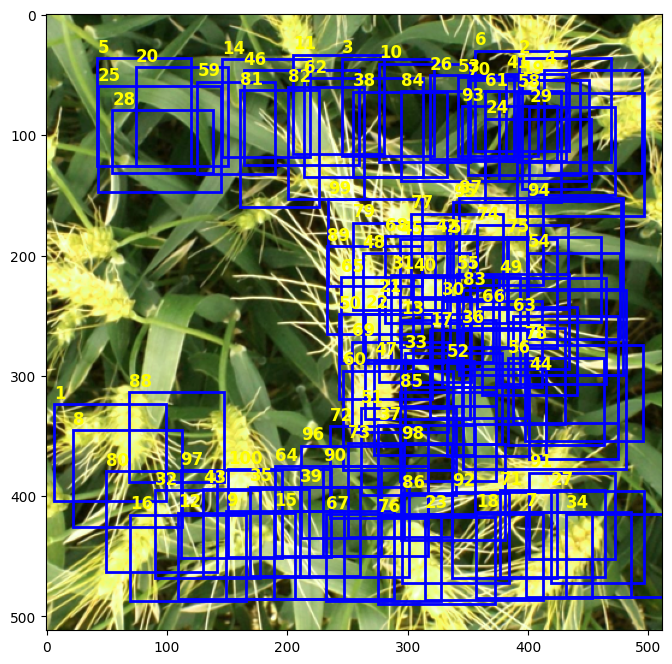

In [53]:
# Run sample predictions
model.eval()
with torch.no_grad():
    prediction = model([sample_image])[0]
    visualize_predictions(sample_image.cpu(), prediction)

## Saving prediction file

In [54]:
# Load sample submission format and save prediction
submission_df = pd.read_csv(SAMPLE_SUBMISSION_CSV)
submission_df['PredictionString'] = ''  # Placeholder for predictions
submission_df.to_csv('submission.csv', index=False)
print("Sample submission saved as submission.csv")

Sample submission saved as submission.csv
